## 1. 120초 vital data(ECG, PPG)에서 peak 뽑아 pickle에 저장하기

### Detecting Peaks

In [41]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#상위 dir에 있는 파일 읽어오기
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr


#NRS_vital files들의 목록
vital_path = 'NRS_vital_pickle_unzip/NRS_vital_pickle'
f_vital_list = os.listdir(vital_path)

non_ecg, non_ppg = 0, 0
SRATE = 100
i = 0
error_list = []

for f_vital in f_vital_list[0:]:
    i = i + 1
    print('＃##Input', i,'/'+str(len(f_vital_list))+'###')
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    
    #detecting peaks of PPG
    p_cache_path = 'cache/PPG_peaks/'+f_vital
    if os.path.exists(p_cache_path):
        print('already existing PPG peaks')
    else:
        print('finding PPG peaks')
        try:
            minlist, maxlist = arr.detect_peaks((df_vital[['Pleth']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        except Exception as er:
            print('에러발생:', er)
            non_ppg += 1
            error_list.append({'file': f_vital, 'type': 'PPG', 'error': er})
        else:
            pickle.dump((minlist, maxlist), open(p_cache_path, 'wb'))
            print('successfully saved PPG peaks')
    
    #detecting peaks of ECG
    e_cache_path = 'cache/ECG_peaks/'+f_vital
    if os.path.exists(e_cache_path):
        print('already existing ECG peaks')
    else:
        print('finding ECG peaks')
        try:
            r_peak_list = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()),100)
        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(e_cache_path, 'wb'))
            print('successfully saved ECG peaks')

print('No PPG data:', non_ppg)
print('No ECG data:', non_ecg)

＃##Input 1 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 9 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 10 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 11 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 12 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 13 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 14 /8318###
already exist

already existing ECG peaks
＃##Input 214 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 215 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 216 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 217 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 218 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 219 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 220 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 221 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 222 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 223 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 224 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 225 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 226 /8318###
already existing PPG peaks
already exis

에러발생: attempt to get argmin of an empty sequence
＃##Input 386 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 387 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 388 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 389 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 390 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 391 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 392 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 393 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 394 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 395 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 396 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 397 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 398 /8318###
already existing 

already existing ECG peaks
＃##Input 503 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 504 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 505 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 506 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 507 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 508 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 509 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 510 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 511 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 512 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 513 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 514 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 515 /8318###
already existing PPG peaks
already exis

already existing PPG peaks
already existing ECG peaks
＃##Input 622 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 623 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 624 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 625 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 626 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 627 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 628 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 629 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 630 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 631 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 632 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 633 /8318###
already existing PPG peaks
finding ECG peaks
에러발생: attempt to get argmin of an empty seq

already existing ECG peaks
＃##Input 741 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 742 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 743 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 744 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 745 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 746 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 747 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 748 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 749 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 750 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 751 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 752 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 753 /8318###
already existing PPG peaks
already exis

already existing ECG peaks
＃##Input 859 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 860 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 861 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 862 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 863 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 864 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 865 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 866 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 867 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 868 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 869 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 870 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 871 /8318###
already existing PPG peaks
already exis

에러발생: cannot do a non-empty take from an empty axes.
already existing ECG peaks
＃##Input 975 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 976 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 977 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 978 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 979 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 980 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 981 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 982 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 983 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 984 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 985 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 986 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input

already existing PPG peaks
already existing ECG peaks
＃##Input 1083 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1084 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1085 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1086 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1087 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1088 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1089 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1090 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1091 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1092 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1093 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1094 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1095 /8318###

already existing PPG peaks
already existing ECG peaks
＃##Input 1283 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1284 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1285 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1286 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1287 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1288 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1289 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1290 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1291 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1292 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1293 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1294 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1295 /8318###

에러발생: attempt to get argmin of an empty sequence
＃##Input 1403 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1404 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1405 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1406 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1407 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1408 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1409 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1410 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1411 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1412 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1413 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1414 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1415 /8318###
alre

already existing PPG peaks
already existing ECG peaks
＃##Input 1520 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1521 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1522 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1523 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1524 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1525 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1526 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1527 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1528 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1529 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1530 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1531 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1532 /8318###

에러발생: attempt to get argmin of an empty sequence
＃##Input 1661 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1662 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1663 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1664 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1665 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1666 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1667 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1668 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1669 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1670 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1671 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1672 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1673 /8318###
alre

already existing ECG peaks
＃##Input 1779 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1780 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1781 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1782 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1783 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1784 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1785 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1786 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1787 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1788 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1789 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1790 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1791 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 1892 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1893 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1894 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1895 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1896 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1897 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1898 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1899 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1900 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1901 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1902 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1903 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 1904 /8318###

already existing ECG peaks
＃##Input 2113 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2114 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2115 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2116 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2117 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2118 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2119 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2120 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2121 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2122 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2123 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2124 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2125 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 2233 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2234 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2235 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2236 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2237 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2238 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2239 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2240 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2241 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2242 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2243 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2244 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2245 /8318###

already existing ECG peaks
＃##Input 2352 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2353 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2354 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2355 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2356 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2357 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2358 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2359 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2360 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2361 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2362 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2363 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2364 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 2557 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2558 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2559 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2560 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2561 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2562 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2563 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2564 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2565 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2566 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2567 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2568 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2569 /8318###

already existing ECG peaks
＃##Input 2667 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2668 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2669 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2670 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2671 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2672 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2673 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2674 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2675 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2676 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2677 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2678 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2679 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 2866 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2867 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2868 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2869 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2870 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2871 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2872 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2873 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2874 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2875 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2876 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2877 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2878 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 2981 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2982 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2983 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2984 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2985 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2986 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2987 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2988 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2989 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2990 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2991 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2992 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 2993 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 3096 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3097 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3098 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3099 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3100 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3101 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3102 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3103 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3104 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3105 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3106 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3107 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3108 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 3305 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3306 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3307 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3308 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3309 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3310 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3311 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3312 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3313 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3314 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3315 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3316 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3317 /8318###

already existing PPG peaks
already existing ECG peaks
＃##Input 3416 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3417 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3418 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3419 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3420 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3421 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3422 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3423 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3424 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3425 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3426 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3427 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3428 /8318###

already existing PPG peaks
already existing ECG peaks
＃##Input 3634 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3635 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3636 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3637 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3638 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3639 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3640 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3641 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3642 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3643 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3644 /8318###
finding PPG peaks
HR estimation failed, assume 75
에러발생: cannot do a non-empty take from an empty axes.
already existing ECG peaks
＃##Input 3645 /8318###


already existing PPG peaks
already existing ECG peaks
＃##Input 3770 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3771 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3772 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3773 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3774 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3775 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3776 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3777 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3778 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3779 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3780 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3781 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3782 /8318###

already existing ECG peaks
＃##Input 3877 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3878 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3879 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3880 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3881 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3882 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3883 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3884 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3885 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3886 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3887 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3888 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3889 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 3985 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3986 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3987 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3988 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3989 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3990 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3991 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3992 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3993 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3994 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3995 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3996 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 3997 /8318###

already existing ECG peaks
＃##Input 4151 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4152 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4153 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4154 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4155 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4156 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4157 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4158 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4159 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4160 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4161 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4162 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4163 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 4372 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4373 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4374 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4375 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4376 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4377 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4378 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4379 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4380 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4381 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4382 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4383 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4384 /8318###

already existing ECG peaks
＃##Input 4594 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4595 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4596 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4597 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4598 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4599 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4600 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4601 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4602 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4603 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4604 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4605 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4606 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 4797 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4798 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4799 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4800 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4801 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4802 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4803 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4804 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4805 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4806 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4807 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4808 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4809 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 4913 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4914 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4915 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4916 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4917 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4918 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4919 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4920 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4921 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4922 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4923 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4924 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 4925 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 5029 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5030 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5031 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5032 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5033 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5034 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5035 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5036 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5037 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5038 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5039 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5040 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5041 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 5145 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5146 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5147 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5148 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5149 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5150 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5151 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5152 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5153 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5154 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5155 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5156 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5157 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 5261 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5262 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5263 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5264 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5265 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5266 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5267 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5268 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5269 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5270 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5271 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5272 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5273 /8318###
already existing PPG peaks

에러발생: attempt to get argmin of an empty sequence
＃##Input 5458 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5459 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5460 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5461 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5462 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5463 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5464 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5465 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5466 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5467 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5468 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5469 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5470 /8318###
alre

already existing ECG peaks
＃##Input 5575 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5576 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5577 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5578 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5579 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5580 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5581 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5582 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5583 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5584 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5585 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5586 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5587 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 5694 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5695 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5696 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5697 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5698 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5699 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5700 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5701 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5702 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5703 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5704 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5705 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5706 /8318###

already existing PPG peaks
already existing ECG peaks
＃##Input 5894 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5895 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5896 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5897 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5898 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5899 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5900 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5901 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5902 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5903 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5904 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5905 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 5906 /8318###

에러발생: attempt to get argmin of an empty sequence
＃##Input 6030 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6031 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6032 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6033 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6034 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6035 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6036 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6037 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6038 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6039 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6040 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6041 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6042 /8318###
alre

already existing PPG peaks
already existing ECG peaks
＃##Input 6240 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6241 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6242 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6243 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6244 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6245 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6246 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6247 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6248 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6249 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6250 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6251 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6252 /8318###

already existing ECG peaks
＃##Input 6445 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6446 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6447 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6448 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6449 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6450 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6451 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6452 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6453 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6454 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6455 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6456 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6457 /8318###
finding PPG peaks
에러발생: at

already existing ECG peaks
＃##Input 6572 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6573 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6574 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6575 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6576 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6577 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6578 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6579 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6580 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6581 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6582 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6583 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6584 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 6691 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6692 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6693 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6694 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6695 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6696 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6697 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6698 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6699 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6700 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6701 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6702 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6703 /8318###

already existing ECG peaks
＃##Input 6807 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6808 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6809 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6810 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6811 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6812 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6813 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6814 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6815 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6816 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6817 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6818 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 6819 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 7011 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7012 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7013 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7014 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7015 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7016 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7017 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7018 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7019 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7020 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7021 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7022 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7023 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 7209 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7210 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7211 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7212 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7213 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7214 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7215 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7216 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7217 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7218 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7219 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7220 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7221 /8318###

already existing PPG peaks
already existing ECG peaks
＃##Input 7411 /8318###
finding PPG peaks
에러발생: attempt to get argmin of an empty sequence
finding ECG peaks
에러발생: attempt to get argmin of an empty sequence
＃##Input 7412 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7413 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7414 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7415 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7416 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7417 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7418 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7419 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7420 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7421 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7422 /8318

already existing ECG peaks
＃##Input 7529 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7530 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7531 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7532 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7533 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7534 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7535 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7536 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7537 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7538 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7539 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7540 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7541 /8318###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 7647 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7648 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7649 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7650 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7651 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7652 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7653 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7654 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7655 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7656 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7657 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7658 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7659 /8318###

already existing ECG peaks
＃##Input 7857 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7858 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7859 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7860 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7861 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7862 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7863 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7864 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7865 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7866 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7867 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7868 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7869 /8318###
already existing PPG peaks

already existing ECG peaks
＃##Input 7971 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7972 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7973 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7974 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7975 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7976 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7977 /8318###
already existing PPG peaks
finding ECG peaks
에러발생: attempt to get argmin of an empty sequence
＃##Input 7978 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7979 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7980 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7981 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 7982 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 

already existing PPG peaks
already existing ECG peaks
＃##Input 8092 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8093 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8094 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8095 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8096 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8097 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8098 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8099 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8100 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8101 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8102 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8103 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8104 /8318###

already existing PPG peaks
already existing ECG peaks
＃##Input 8207 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8208 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8209 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8210 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8211 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8212 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8213 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8214 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8215 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8216 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8217 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8218 /8318###
already existing PPG peaks
already existing ECG peaks
＃##Input 8219 /8318###

### 1.1 Error 뜬 파일 목록

In [44]:
print('number of data with error:', len(error_list))
print('---error lists---')
    
error_idx = 0
for error in error_list:
    error_idx += 1
    print('error', error_idx, ':', 'file:', error['file'], '의', error['type'], error['error'])

pickle.dump(error_list, open('cache/peak_detect_error_list','wb'))

number of data with error: 29
---error lists---
error 1 : file: 5.0,8195,PACU1_6_201022_153924.csv 의 ECG attempt to get argmin of an empty sequence
error 2 : file: 5.0,5761,PACU1_6_200609_202804.csv 의 ECG attempt to get argmin of an empty sequence
error 3 : file: 4.0,4443,PACU1_7_200311_143000.csv 의 PPG cannot do a non-empty take from an empty axes.
error 4 : file: 3.0,3579,PACU1_4_200207_154859.csv 의 PPG cannot do a non-empty take from an empty axes.
error 5 : file: 7.0,612,PACU1_7_190524_125100.csv 의 PPG cannot do a non-empty take from an empty axes.
error 6 : file: 5.0,6454,PACU1_8_200715_100815.csv 의 PPG attempt to get argmin of an empty sequence
error 7 : file: 5.0,6454,PACU1_8_200715_100815.csv 의 ECG attempt to get argmin of an empty sequence
error 8 : file: 4.0,118,PACU1_4_190425_135522.csv 의 ECG attempt to get argmin of an empty sequence
error 9 : file: 5.0,2070,PACU1_2_190903_151956.csv 의 PPG attempt to get argmin of an empty sequence
error 10 : file: 6.0,8200,PACU1_10_201023_

### Preprocessing
- Data Sampling: 120초를 5초씩 겹쳐 10초짜리 input 생성 (23개)

In [1]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)

In [83]:
# vital data 저장 경로
vital_path = 'NRS_vital_pickle_unzip/NRS_vital_pickle'
f_vital_list = os.listdir(vital_path)

# input 설정
LEN_INPUT = 10 # input 10s
n_aug = int((120-LEN_INPUT)/5) + 1 # data augmentation 개수

# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


SRATE, f_num = 100, 8000
for f_vital in f_vital_list[8000:]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists('cache/PPG_peaks/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists('cache/ECG_peaks/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_min, ppg_peak = pickle.load(open('cache/PPG_peaks/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open('cache/ECG_peaks/'+f_vital, 'rb'))
    
    ppg_min, ppg_peak = np.array([ppg_min]), np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 10초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*5*SRATE # 500i
        end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[0:len(df_vital_input)] = df_vital_input['Pleth'].tolist()
        seg_ecg[0:len(df_vital_input)] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.3 or nan_ecg_perc > 0.3 or nan_both_perc > 0.2:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 5개 이하는 noise가 많이 낀 상황 (10초 구간 중 peak가 7초 이상 없으면 문제 -> 즉 peak 개수 범위는 7/2 ~ 7/0.4)
        # 따라서 peak가 7초 이상 있어야하고 이때 최소 peak 개수는 3.5개
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<=4 or len(idx_ecg_peak)<=4:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 40 < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 200:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 40 < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 200:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 200
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.8:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.8:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.3 and nan_ecg_perc < 0.3 and nan_both_perc < 0.2 and noise_ppg_perc < 0.5 and noise_ecg_perc < 0.5:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

    if f_num%1000 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 8318')
        pickle.dump(df_preprocess, open('cache/df_preprocess2_8000-8318', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 8318')
pickle.dump(df_preprocess, open('cache/df_preprocess2_8000-8318', 'wb'))


###Input 8001 / 8318: 6.0,1775,PACU1_10_190822_102035.csv###
###Input 8002 / 8318: 8.0,2318,PACU1_8_190910_165227.csv###
###Input 8003 / 8318: 4.0,1741,PACU1_10_190821_154935.csv###
###Input 8004 / 8318: 6.0,1258,PACU1_1_190717_084957.csv###
###Input 8005 / 8318: 3.0,6641,PACU1_11_200722_154343.csv###
###Input 8006 / 8318: 3.0,4104,PACU1_8_200228_150109.csv###
###Input 8007 / 8318: 5.0,5489,PACU1_6_200529_121341.csv###
###Input 8008 / 8318: 6.0,6847,PACU1_3_200803_214151.csv###
###Input 8009 / 8318: 3.0,3489,PACU1_10_200205_120438.csv###
###Input 8010 / 8318: 3.0,5591,PACU1_6_200603_105816.csv###
###Input 8011 / 8318: 4.0,2127,PACU1_5_190904_154406.csv###
###Input 8012 / 8318: 5.0,8074,PACU1_5_201016_183640.csv###
###Input 8013 / 8318: 2.0,6263,PACU1_7_200703_140756.csv###
###Input 8014 / 8318: 3.0,7224,PACU1_7_200825_104427.csv###
###Input 8015 / 8318: 4.0,6246,PACU1_9_200702_140935.csv###
###Input 8016 / 8318: 7.0,3265,PACU1_10_200123_095532.csv###
###Input 8017 / 8318: 6.0,7849,PACU

###Input 8139 / 8318: 7.0,2492,PACU1_3_191021_173645.csv###
###Input 8140 / 8318: 8.0,989,PACU1_4_190705_131726.csv###
###Input 8141 / 8318: 5.0,5508,PACU1_1_200529_184034.csv###
###Input 8142 / 8318: 3.0,8223,PACU1_3_201026_113257.csv###
###Input 8143 / 8318: 5.0,5056,PACU1_1_200511_181056.csv###
###Input 8144 / 8318: 8.0,7074,PACU1_10_200818_100610.csv###
###Input 8145 / 8318: 6.0,6291,PACU1_3_200706_144035.csv###
###Input 8146 / 8318: 7.0,507,PACU1_3_190516_120110.csv###
###Input 8147 / 8318: 4.0,8368,PACU1_9_201030_143942.csv###
###Input 8148 / 8318: 3.0,5132,PACU1_1_200514_104348.csv###
###Input 8149 / 8318: 7.0,7049,PACU1_7_200814_165148.csv###
###Input 8150 / 8318: 4.0,3761,PACU1_5_200217_085155.csv###
###Input 8151 / 8318: 3.0,3104,PACU1_6_200117_124202.csv###
###Input 8152 / 8318: 4.0,4475,PACU1_6_200312_185900.csv###
###Input 8153 / 8318: 4.0,8015,PACU1_2_201014_133351.csv###
###Input 8154 / 8318: 2.0,2661,PACU1_1_191223_091942.csv###
###Input 8155 / 8318: 2.0,6992,PACU1_1_20

###Input 8275 / 8318: 5.0,6450,PACU1_1_200715_090851.csv###
###Input 8276 / 8318: 3.0,4455,PACU1_7_200312_105058.csv###
###Input 8277 / 8318: 4.0,4471,PACU1_3_200312_154412.csv###
###Input 8278 / 8318: 5.0,186,PACU1_1_190430_185637.csv###
###Input 8279 / 8318: 4.0,6970,PACU1_9_200811_141457.csv###
###Input 8280 / 8318: 5.0,5952,PACU1_4_200617_000155.csv###
###Input 8281 / 8318: 5.0,5141,PACU1_7_200514_121133.csv###
###Input 8282 / 8318: 4.0,2980,PACU1_5_200113_235540.csv###
###Input 8283 / 8318: 2.0,7802,PACU1_3_201005_151042.csv###
###Input 8284 / 8318: 3.0,5343,PACU1_4_200525_154901.csv###
###Input 8285 / 8318: 5.0,4572,PACU1_7_200318_091050.csv###
###Input 8286 / 8318: 4.0,2084,PACU1_3_190903_171214.csv###
###Input 8287 / 8318: 3.0,3566,PACU1_10_200207_131048.csv###
###Input 8288 / 8318: 5.0,4816,PACU1_9_200326_121132.csv###
###Input 8289 / 8318: 3.0,4202,PACU1_5_200302_200759.csv###
###Input 8290 / 8318: 3.0,4745,PACU1_9_200324_103207.csv###
###Input 8291 / 8318: 5.0,5099,PACU1_1_2

### df_preprocess 하나로 합치기

In [46]:
common_path = 'cache/df_preprocess2_'
df_p1 = pickle.load(open(common_path+'0-2000','rb'))
for i in range(1,4):
    df_p1 = pd.concat([df_p1, pickle.load(open(common_path+str(i*2000)+'-'+str((i+1)*2000),'rb'))])

df_preprocess = pd.concat([df_p1, pickle.load(open(common_path+'8000-8318','rb'))])

col_file_path = np.array(df_preprocess['file_path'].str.split(',').values.flatten())
df_preprocess.insert(0,'caseids',[col_file_path[i][2] for i in range(len(col_file_path))])
df_preprocess.insert(1, 'NRS', [col_file_path[i][0] for i in range(len(col_file_path))])

# 중복된 행이 있는지 확인
print('초기 sample 수:', len(f_vital_list))
print('-ECG가 없는 sample:', non_ecg) #7
print('-PPG가 없는 sample:', non_ppg) #17
print('total df size:', len(df_preprocess))
print('after removing same files:', len(df_preprocess.drop_duplicates(['file_path'])))

print('dumping start')
pickle.dump(df_preprocess, open('../DL_model/cache/df_preprocess2','wb'))
print('dumping success')

df_preprocess

초기 sample 수: 8318
-ECG가 없는 sample: 12
-PPG가 없는 sample: 17
total df size: 8294
after removing same files: 8294
dumping start
dumping success


,caseids,NRS,file_path,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,PACU1_2_190503_132609.csv,3.0,"3.0,249,PACU1_2_190503_132609.csv","(False, [0.688, 0.688, 0.688], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [0.95, 0.95, 0.95], [-1, -1])","(False, [0.45, 0.45, 0.45], [-1, -1])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])",...,"(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.07142857142857142, ...","(True, [0.0, 0.0, 0.0], [0.14285714285714285, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.07142857142857...","(True, [0.0, 0.0, 0.0], [0.0, 0.07142857142857...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(False, [0.297, 0.297, 0.297], [-1, -1])","(False, [0.361, 0.361, 0.361], [-1, -1])","(True, [0.064, 0.064, 0.064], [0.1538461538461..."
1,PACU1_5_190723_131001.csv,8.0,"8.0,1444,PACU1_5_190723_131001.csv","(False, [0.0, 0.0, 0.0], [0.0, 0.8888888888888...","(False, [0.0, 0.0, 0.0], [0.0, 1.0])","(False, [0.0, 0.0, 0.0], [0.23076923076923078,...","(False, [0.0, 0.0, 0.0], [0.25, 0.875])","(False, [0.0, 0.0, 0.0], [0.18181818181818182,...","(False, [0.0, 0.0, 0.0], [0.36363636363636365,...","(False, [0.0, 0.0, 0.0], [0.4, 1.0])",...,"(False, [0.0, 0.0, 0.0], [0.08333333333333333,...","(False, [0.0, 0.0, 0.0], [0.07692307692307693,...","(False, [0.0, 0.0, 0.0], [0.36363636363636365,...","(False, [0.0, 0.0, 0.0], [0.45454545454545453,...","(False, [0.0, 0.0, 0.0], [0.3333333333333333, ...","(False, [0.0, 0.0, 0.0], [0.16666666666666666,...","(False, [0.0, 0.0, 0.0], [0.07692307692307693,...","(False, [0.0, 0.0, 0.0], [0.36363636363636365,...","(False, [0.0, 0.0, 0.0], [0.2727272727272727, ...","(False, [0.0, 0.0, 0.0], [0.08333333333333333,..."
2,PACU1_12_200604_165543.csv,3.0,"3.0,5650,PACU1_12_200604_165543.csv","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.11111111111111...","(True, [0.0, 0.0, 0.0], [0.0, 0.11111111111111...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])",...,"(True, [0.0, 0.0, 0.0], [0.09090909090909091, ...","(True, [0.0, 0.0, 0.0], [0.4444444444444444, 0...","(True, [0.0, 0.0, 0.0], [0.2, 0.09090909090909...","(True, [0.0, 0.0, 0.0], [0.08333333333333333, ...","(True, [0.0, 0.0, 0.0], [0.09090909090909091, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])"
3,PACU1_12_200528_152944.csv,6.0,"6.0,5450,PACU1_12_200528_152944.csv","(True, [0.0, 0.0, 0.0], [0.3, 0.3])","(False, [0.0, 0.0, 0.0], [0.5, 0.2727272727272...","(True, [0.0, 0.0, 0.0], [0.3333333333333333, 0...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.09090909090909091, ...","(True, [0.0, 0.0, 0.0], [0.09090909090909091, ...",...,"(True, [0.0, 0.0, 0.0], [0.2727272727272727, 0...","(True, [0.0, 0.0, 0.0], [0.18181818181818182, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.08333333333333333, ...","(True, [0.0, 0.0, 0.0], [0.09090909090909091, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.09090909090909091, ...","(False, [0.0, 0.0, 0.0], [0.5454545454545454, ...","(False, [0.0, 0.0, 0.0], [0.5, 0.0])"
4,PACU1_12_201008_143103.csv,3.0,"3.0,7909,PACU1_12_201008_143103.csv","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])",...,"(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.

## Pre-op Data

In [24]:
import os, sys
import pickle
import pandas as pd
import numpy as np
from pyvital2 import arr

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)

### Detecting Peaks

In [37]:
#NRS_vital files들의 목록
vital_path = 'preop_vital/preop'
f_vital_list = os.listdir(vital_path)



SRATE = 100
i = 0
error_list = []
for f_vital in f_vital_list[0:]:
    i = i + 1
    print('＃##Input', i,'/'+str(len(f_vital_list))+'###')
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    
    #detecting peaks of PPG
    p_cache_path = 'cache/PPG_peaks/'+f_vital
    if os.path.exists(p_cache_path):
        print('already existing PPG peaks')
    else:
        print('finding PPG peaks')
        try:
            minlist, maxlist = arr.detect_peaks((df_vital[['Pleth']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        except Exception as er:
            print('에러발생:', er)
            error_list.append({'file': f_vital, 'type': 'PPG', 'error': er})
        else:
            pickle.dump((minlist, maxlist), open(p_cache_path, 'wb'))
            print('successfully saved PPG peaks')
    
    #detecting peaks of ECG
    e_cache_path = 'cache/ECG_peaks/'+f_vital
    if os.path.exists(e_cache_path):
        print('already existing ECG peaks')
    else:
        print('finding ECG peaks')
        try:
            r_peak_list = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()),100)
        except Exception as er:
            print('에러발생:', er)
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(e_cache_path, 'wb'))
            print('successfully saved ECG peaks')
            

＃##Input 1 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 4 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 5 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 6 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 7 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 8 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 9 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 10 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 11 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 12 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 13 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 14 /3888###
already exist

already existing ECG peaks
＃##Input 129 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 130 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 131 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 132 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 133 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 134 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 135 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 136 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 137 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 138 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 139 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 140 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 141 /3888###
already existing PPG peaks
already exis

already existing PPG peaks
already existing ECG peaks
＃##Input 266 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 267 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 268 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 269 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 270 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 271 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 272 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 273 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 274 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 275 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 276 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 277 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 278 /3888###
already exis

already existing PPG peaks
already existing ECG peaks
＃##Input 392 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 393 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 394 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 395 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 396 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 397 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 398 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 399 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 400 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 401 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 402 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 403 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 404 /3888###
already exis

already existing ECG peaks
＃##Input 515 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 516 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 517 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 518 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 519 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 520 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 521 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 522 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 523 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 524 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 525 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 526 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 527 /3888###
already existing PPG peaks
already exis

already existing ECG peaks
＃##Input 656 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 657 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 658 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 659 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 660 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 661 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 662 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 663 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 664 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 665 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 666 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 667 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 668 /3888###
already existing PPG peaks
already exis

already existing PPG peaks
already existing ECG peaks
＃##Input 772 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 773 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 774 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 775 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 776 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 777 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 778 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 779 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 780 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 781 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 782 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 783 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 784 /3888###
already exis

already existing PPG peaks
already existing ECG peaks
＃##Input 905 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 906 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 907 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 908 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 909 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 910 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 911 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 912 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 913 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 914 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 915 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 916 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 917 /3888###
already exis

already existing PPG peaks
already existing ECG peaks
＃##Input 1048 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1049 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1050 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1051 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1052 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1053 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1054 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1055 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1056 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1057 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1058 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1059 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1060 /3888###

already existing PPG peaks
already existing ECG peaks
＃##Input 1178 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1179 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1180 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1181 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1182 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1183 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1184 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1185 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1186 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1187 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1188 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1189 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1190 /3888###

already existing PPG peaks
already existing ECG peaks
＃##Input 1316 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1317 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1318 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1319 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1320 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1321 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1322 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1323 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1324 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1325 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1326 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1327 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1328 /3888###

already existing ECG peaks
＃##Input 1446 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1447 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1448 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1449 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1450 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1451 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1452 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1453 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1454 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1455 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1456 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1457 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1458 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 1577 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1578 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1579 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1580 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1581 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1582 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1583 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1584 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1585 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1586 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1587 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1588 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1589 /3888###

already existing ECG peaks
＃##Input 1706 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1707 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1708 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1709 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1710 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1711 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1712 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1713 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1714 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1715 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1716 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1717 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1718 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 1826 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1827 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1828 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1829 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1830 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1831 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1832 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1833 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1834 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1835 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1836 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1837 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1838 /3888###

already existing ECG peaks
＃##Input 1945 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1946 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1947 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1948 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1949 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1950 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1951 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1952 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1953 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1954 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1955 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1956 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 1957 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 2062 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2063 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2064 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2065 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2066 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2067 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2068 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2069 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2070 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2071 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2072 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2073 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2074 /3888###

already existing ECG peaks
＃##Input 2195 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2196 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2197 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2198 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2199 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2200 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2201 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2202 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2203 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2204 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2205 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2206 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2207 /3888###
already existing PPG peaks

already existing ECG peaks
＃##Input 2333 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2334 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2335 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2336 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2337 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2338 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2339 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2340 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2341 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2342 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2343 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2344 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2345 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 2456 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2457 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2458 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2459 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2460 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2461 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2462 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2463 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2464 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2465 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2466 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2467 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2468 /3888###

already existing PPG peaks
already existing ECG peaks
＃##Input 2593 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2594 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2595 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2596 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2597 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2598 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2599 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2600 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2601 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2602 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2603 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2604 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2605 /3888###

already existing ECG peaks
＃##Input 2732 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2733 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2734 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2735 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2736 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2737 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2738 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2739 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2740 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2741 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2742 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2743 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2744 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 2848 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2849 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2850 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2851 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2852 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2853 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2854 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2855 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2856 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2857 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2858 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2859 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2860 /3888###

already existing ECG peaks
＃##Input 2960 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2961 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2962 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2963 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2964 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2965 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2966 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2967 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2968 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2969 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2970 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2971 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 2972 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 3079 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3080 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3081 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3082 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3083 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3084 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3085 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3086 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3087 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3088 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3089 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3090 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3091 /3888###

already existing PPG peaks
already existing ECG peaks
＃##Input 3199 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3200 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3201 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3202 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3203 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3204 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3205 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3206 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3207 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3208 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3209 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3210 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3211 /3888###

already existing ECG peaks
＃##Input 3341 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3342 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3343 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3344 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3345 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3346 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3347 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3348 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3349 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3350 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3351 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3352 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3353 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 3485 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3486 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3487 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3488 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3489 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3490 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3491 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3492 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3493 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3494 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3495 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3496 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3497 /3888###

already existing ECG peaks
＃##Input 3609 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3610 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3611 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3612 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3613 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3614 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3615 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3616 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3617 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3618 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3619 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3620 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3621 /3888###
already existing PPG peaks

already existing ECG peaks
＃##Input 3736 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3737 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3738 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3739 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3740 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3741 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3742 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3743 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3744 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3745 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3746 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3747 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3748 /3888###
already existing PPG peaks

already existing PPG peaks
already existing ECG peaks
＃##Input 3856 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3857 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3858 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3859 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3860 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3861 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3862 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3863 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3864 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3865 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3866 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3867 /3888###
already existing PPG peaks
already existing ECG peaks
＃##Input 3868 /3888###

In [38]:
non_ecg, non_ppg = 0, 0

for error in error_list:
    if error['type'] == 'PPG':
        non_ppg+=1
    if error['type'] == 'ECG':
        non_ecg+=1
        
print('No PPG data:', non_ppg)
print('No ECG data:', non_ecg)

No PPG data: 9
No ECG data: 0


### Preprocessing

In [36]:
# vital data 저장 경로
vital_path = 'preop_vital/preop'
f_vital_list = os.listdir(vital_path)

# input 설정
LEN_INPUT = 10 # input 10s
n_aug = int((120-LEN_INPUT)/5) + 1 # data augmentation 개수

# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


SRATE, f_num = 100, 0
for f_vital in f_vital_list[0:1000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists('cache/PPG_peaks/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists('cache/ECG_peaks/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_min, ppg_peak = pickle.load(open('cache/PPG_peaks/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open('cache/ECG_peaks/'+f_vital, 'rb'))
    
    ppg_min, ppg_peak = np.array([ppg_min]), np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 10초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*5*SRATE # 500i
        end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[0:len(df_vital_input)] = df_vital_input['Pleth'].tolist()
        seg_ecg[0:len(df_vital_input)] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.3 or nan_ecg_perc > 0.3 or nan_both_perc > 0.2:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 5개 이하는 noise가 많이 낀 상황 (10초 구간 중 peak가 7초 이상 없으면 문제 -> 즉 peak 개수 범위는 7/2 ~ 7/0.4)
        # 따라서 peak가 7초 이상 있어야하고 이때 최소 peak 개수는 3.5개
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<=4 or len(idx_ecg_peak)<=4:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 40 < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 200:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 40 < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 200:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 200
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.8:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.8:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.3 and nan_ecg_perc < 0.3 and nan_both_perc < 0.2 and noise_ppg_perc < 0.5 and noise_ecg_perc < 0.5:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

    if f_num%1000 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 3888')
        pickle.dump(df_preprocess, open('cache/df_preprocess_preop_1000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 3888')
pickle.dump(df_preprocess, open('cache/df_preprocess_preop_0-1000', 'wb'))


###Input 1 / 3888: 0.0,7304,PACU1_3_200909_132401.csv###
###Input 2 / 3888: 0.0,5131,PACU1_1_200514_104348.csv###
###Input 3 / 3888: 0.0,2222,PACU1_7_190906_142446.csv###
###Input 4 / 3888: 0.0,758,PACU1_5_190531_124635.csv###
###Input 5 / 3888: 0.0,5,PACU1_1_190409_133948.csv###
###Input 6 / 3888: 0.0,7270,PACU1_6_200902_103630.csv###
###Input 7 / 3888: 0.0,6780,PACU1_1_200730_115233.csv###
###Input 8 / 3888: 0.0,5525,PACU1_1_200601_131308.csv###
###Input 9 / 3888: 0.0,5722,PACU1_1_200608_192708.csv###
###Input 10 / 3888: 0.0,2707,PACU1_2_200102_132423.csv###
###Input 11 / 3888: 0.0,3390,PACU1_7_200131_095818.csv###
###Input 12 / 3888: 0.0,1480,PACU1_8_190816_110423.csv###
###Input 13 / 3888: 0.0,5219,PACU1_3_200518_114244.csv###
###Input 14 / 3888: 0.0,3601,PACU1_5_200210_104932.csv###
###Input 15 / 3888: 0.0,5763,PACU1_7_200610_091333.csv###
###Input 16 / 3888: 0.0,2646,PACU1_7_191219_165512.csv###
###Input 17 / 3888: 0.0,2034,PACU1_11_190902_153658.csv###
###Input 18 / 3888: 0.0,40

KeyboardInterrupt: 

### df 하나로 합치기 및 저장

In [40]:
common_path = 'cache/df_preprocess_preop_'
df_p1 = pickle.load(open(common_path+'0-1000','rb'))
for i in range(1,3):
    df_p1 = pd.concat([df_p1, pickle.load(open(common_path+str(i*1000)+'-'+str((i+1)*1000),'rb'))])

df_preprocess_t = pd.concat([df_p1, pickle.load(open(common_path+'3000-3888','rb'))])

# 중복된 행이 있는지 확인
print('초기 sample 수:', len(f_vital_list))
print('-ECG가 없는 sample:', non_ecg) 
print('-PPG가 없는 sample:', non_ppg) #17
print('total df size:', len(df_preprocess_t))
print('after removing same files:', len(df_preprocess_t.drop_duplicates(['file_path'])))

col_file_path = np.array(df_preprocess_t['file_path'].str.split(',').values.flatten())
df_preprocess_t.insert(0,'caseids',[col_file_path[i][2] for i in range(len(col_file_path))])
df_preprocess_t.insert(1, 'NRS', [col_file_path[i][0] for i in range(len(col_file_path))])


print('dumping start')
pickle.dump(df_preprocess_t, open('../DL_model/cache/df_preprocess_preop','wb'))
print('dumping success')

df_preprocess_t

초기 sample 수: 3888
-ECG가 없는 sample: 0
-PPG가 없는 sample: 9
total df size: 3879
after removing same files: 3879
dumping start
dumping success


,caseids,NRS,file_path,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,PACU1_3_200909_132401.csv,0.0,"0.0,7304,PACU1_3_200909_132401.csv","(False, [0.002, 0.002, 0.002], [0.7, 0.0])","(True, [0.0, 0.0, 0.0], [0.25, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.08333333333333333, ...","(True, [0.0, 0.0, 0.0], [0.08333333333333333, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.16666666666666...",...,"(True, [0.0, 0.0, 0.0], [0.15384615384615385, ...","(True, [0.0, 0.0, 0.0], [0.36363636363636365, ...","(True, [0.0, 0.0, 0.0], [0.36363636363636365, ...","(True, [0.0, 0.0, 0.0], [0.14285714285714285, ...","(True, [0.0, 0.0, 0.0], [0.25, 0.0714285714285...","(True, [0.0, 0.0, 0.0], [0.16666666666666666, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.07142857142857...","(True, [0.0, 0.0, 0.0], [0.08333333333333333, ...","(True, [0.0, 0.0, 0.0], [0.16666666666666666, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])"
1,PACU1_1_200514_104348.csv,0.0,"0.0,5131,PACU1_1_200514_104348.csv","(True, [0.001, 0.001, 0.001], [0.0, 0.0])","(False, [0.0, 0.0, 0.0], [0.125, 0.875])","(False, [0.0, 0.0, 0.0], [0.25, 0.9])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(False, [0.0, 0.0, 0.0], [0.25, 0.555555555555...","(False, [0.0, 0.0, 0.0], [0.14285714285714285,...","(True, [0.0, 0.0, 0.0], [0.0, 0.125])",...,"(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.11111111111111...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])"
2,PACU1_7_190906_142446.csv,0.0,"0.0,2222,PACU1_7_190906_142446.csv","(False, [0.976, 0.976, 0.976], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])",...,"(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])","(False, [1.0, 1.0, 1.0], [-1, -1])"
3,PACU1_5_190531_124635.csv,0.0,"0.0,758,PACU1_5_190531_124635.csv","(False, [0.0, 0.0, 0.0], [1.0, 0.1111111111111...","(False, [0.0, 0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0, 0.0], [1.0, 0.25])","(False, [0.0, 0.0, 0.0], [0.8333333333333334, ...","(False, [0.0, 0.0, 0.0], [1.0, 0.1111111111111...","(False, [0.0, 0.0, 0.0], [1.0, 0.6666666666666...",...,"(False, [0.0, 0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0, 0.0], [1.0, 0.1111111111111...","(False, [0.0, 0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0, 0.0], [0.8571428571428571, ...","(False, [0.0, 0.0, 0.0], [0.875, 0.0])","(True, [0.0, 0.0, 0.0], [0.125, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])"
4,PACU1_1_190409_133948.csv,0.0,"0.0,5,PACU1_1_190409_133948.csv","(False, [0.0, 0.0, 0.0], [0.2222222222222222, ...","(False, [0.0, 0.0, 0.0], [0.0, 0.7777777777777...","(False, [0.0, 0.0, 0.0], [0.0, 0.9090909090909...","(False, [0.0, 0.0, 0.0], [0.09090909090909091,...","(False, [0.0, 0.0, 0.0], [0.4, 0.8888888888888...","(False, [0.0, 0.0, 0.0], [0.3, 0.8])","(False, [0.0, 0.0, 0.0], [0.1, 0.8])",...,"(True, [0.0, 0.0, 0.0], [0.0, 0.25])","(False, [0.0, 0.0, 0.0], [0.0, 0.75])","(True, [0.0, 0.0, 0.0], [0.0, 0.3])","(False, [0.0, 0.0, 0.0], [0.0, 0.5])","(False, [0.0, 0.0, 0.0], [0.0, 0.5555555555555...","(False, [0.0, 0.0, 0.0], [0.0, 0.8181818181818...","(False, [0.0, 0.0, 0.0], [0.0, 0.9166666666666...","(False, [0.0, 0

In [ ]:
---------------------------------------------------------------------------------------------------------------

---

### 위 코드에서 실수로 ECG나 PPG가 없는 데이터의 df 행을 만들어 이를 제거

<br> After modifying the code, you don't have to run the below cell.
<br> 201119 기준, 이제 아래 코드는 실행할 이유가 없음. 알아서 위에서 처리함

In [190]:
valid_cnt, err_cnt = 0, 0
column_list = [str(i) for i in range(1,24)]
row_valid_list = []

for _, row in df_preprocess_t.iterrows():
    row_valid_cnt = 0
    
    try:
        for column in column_list:
            if row[column][0]:
                row_valid_cnt += 1
                valid_cnt += 1
    except TypeError as e:
        err_cnt += 1
        df_preprocess_t.drop(row.name, inplace = True)
        
    row_valid_list.append(row_valid_cnt)

num_input = len(df_preprocess_t)
num_input_aug = valid_cnt
    
print('값이 없는 데이터:', err_cnt,'/', 8318, '({:.2f}%)'.format(err_cnt/8318*100))
print('값이 없는 행을 뺀 데이터:', num_input)
print('전처리 통과한 비율: ', num_input_aug,'/', num_input*23,'({:.2f}%)'.format(num_input_aug/num_input/23*100)) #, format((valid_cnt/(8318-err_cnt)/23),'.2f'),')')
      

값이 없는 데이터: 23 / 8318 (0.28%)
값이 없는 행을 뺀 데이터: 8295
전처리 통과한 비율:  153328 / 190785 (80.37%)


### pickle에 df_preprocess_t 저장

## 연습장

In [160]:
#df 한 행 예시

,file_path,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,NRS
0,"8.0,7499,PACU1_3_200917_163255.csv","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0, 0.0], [0.0, 0.0])",...,"(True, [0.0, 0.0, 0.0], [0.3076923076923077, 0...","(True, [0.0, 0.0, 0.0], [0.15384615384615385, ...","(True, [0.0, 0.0, 0.0], [0.3076923076923077, 0...","(True, [0.0, 0.0, 0.0], [0.23076923076923078, ...","(True, [0.0, 0.0, 0.0], [0.07142857142857142, ...","(True, [0.0, 0.0, 0.0], [0.2857142857142857, 0...","(True, [0.0, 0.0, 0.0], [0.23076923076923078, ...","(True, [0.0, 0.0, 0.0], [0.07142857142857142, ...","(True, [0.0, 0.0, 0.0], [0.0, 0.0])",8


In [173]:
print(f_vital_list)

['8.0,7499,PACU1_3_200917_163255.csv', '5.0,2070,PACU1_2_190903_151956.csv', '7.0,5548,PACU1_9_200602_120514.csv', '7.0,1300,PACU1_11_190718_094106.csv', '4.0,6185,PACU1_3_200630_134000.csv', '2.0,4867,PACU1_2_200328_000912.csv', '4.0,2098,PACU1_6_190904_091217.csv', '7.0,6075,PACU1_12_200623_152304.csv', '5.0,6557,PACU1_5_200717_132125.csv', '6.0,2283,PACU1_10_190909_173215.csv', '9.0,399,PACU1_8_190514_100124.csv', '9.0,2095,PACU1_6_190904_035427.csv', '3.0,1222,PACU1_4_190715_231003.csv', '8.0,1322,PACU1_9_190718_142653.csv', '3.0,562,PACU1_2_190517_151347.csv', '5.0,3307,PACU1_8_200129_095251.csv', '5.0,5936,PACU1_12_200616_152932.csv', '3.0,5226,PACU1_9_200518_155736.csv', '2.0,3413,PACU1_2_200203_103023.csv', '5.0,7002,PACU1_2_200812_113817.csv', '4.0,5404,PACU1_7_200527_123142.csv', '5.0,4877,PACU1_3_200330_104140.csv', '5.0,541,PACU1_7_190517_112655.csv', '5.0,3698,PACU1_3_200213_204158.csv', '5.0,3746,PACU1_4_200214_180535.csv', '5.0,5366,PACU1_11_200526_131650.csv', '8.0,3284

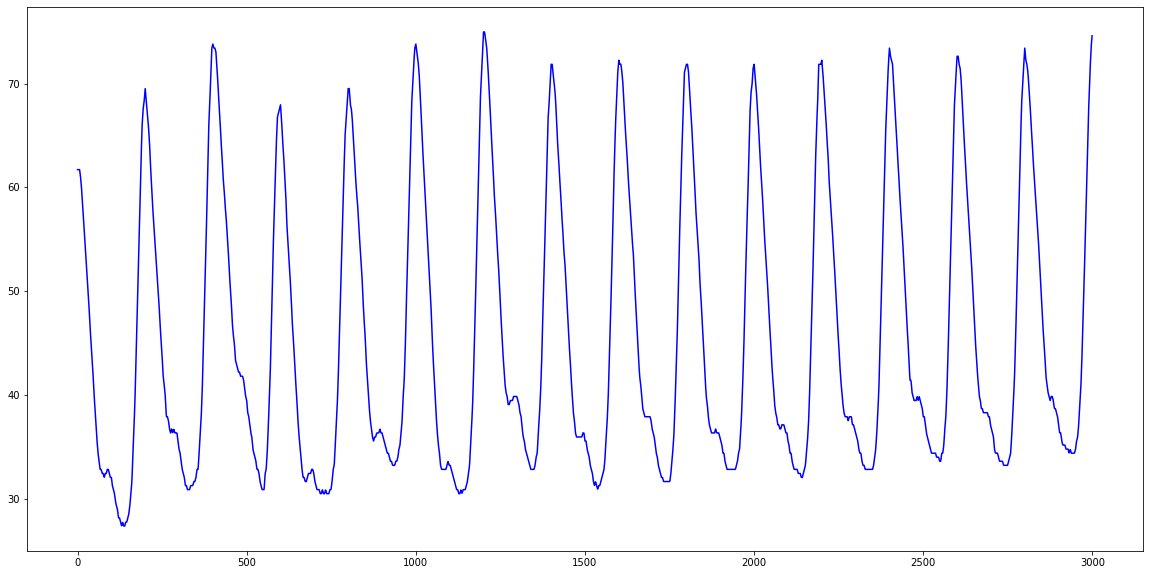

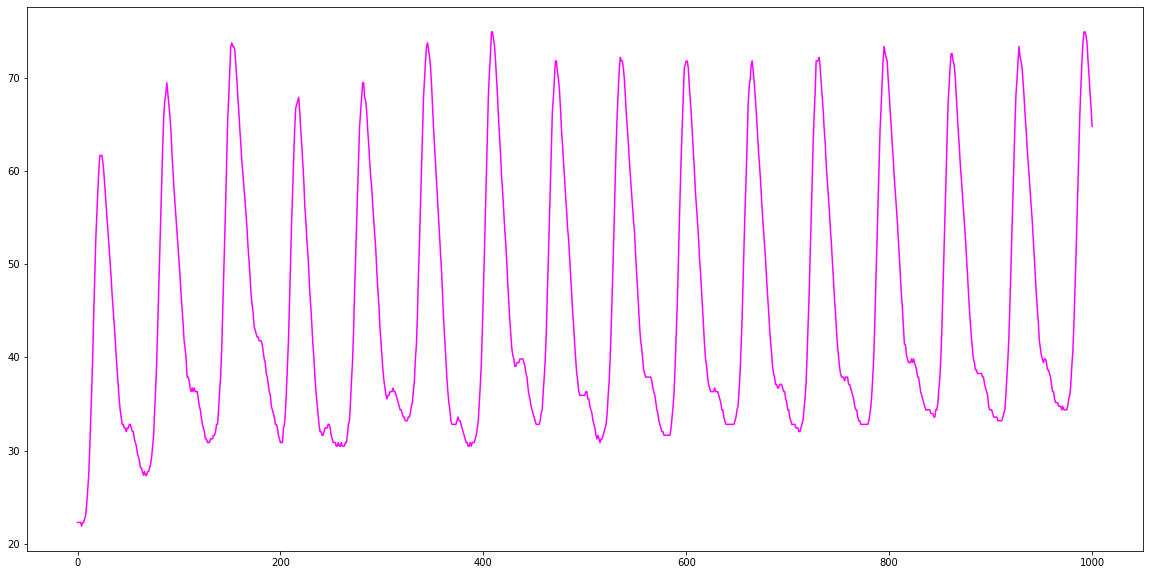

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.plot(np.array(norm_seg_ppg).flatten(), color = 'blue')
plt.show()

plt.figure(figsize = (20,10))
plt.plot(seg_ppg, color = 'magenta')
plt.show()